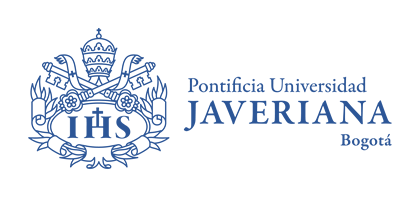

# Técnicas de aprendizaje de máquina - Taller 1

## Integrantes
- Andrés García Montoya
- Juan José Gomez Arenas

## **Importación de Biblioteca**
En primer lugar se realizara la importacion de bibliotecas necesarias.


In [326]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt



---



## **Comprension del Dataset**



### **Carga de Datos**

In [327]:
df = pd.read_excel('German Credit Data.xlsx')

In [328]:
df.head()

,checking account status,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,employment,Installment,status n sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,existing credits no.,Job,liability responsibles,Telephone,foreign worker,Category
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [329]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration in month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age in years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing credits no.,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
liability responsibles,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Category,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   checking account status      1000 non-null   object
 1   Duration in month            1000 non-null   int64 
 2   Credit history               1000 non-null   object
 3   Purpose                      1000 non-null   object
 4   Credit amount                1000 non-null   int64 
 5   Savings account/bonds        1000 non-null   object
 6   employment                   1000 non-null   object
 7    Installment                 1000 non-null   int64 
 8   status n sex                 1000 non-null   object
 9    Other debtors / guarantors  1000 non-null   object
 10  residence                    1000 non-null   int64 
 11  Property                     1000 non-null   object
 12  Age in years                 1000 non-null   int64 
 13  Other installment plans      1000 

---

Dentro del conjunto de datos tratan sobre aspectos financieros y personales de los individuos, como su situación crediticia, historial financiero, empleo y características demográficas, con el fin de evaluar su solvencia y riesgo crediticio que representa un individuo para la consesion del credito.

---








### **Correlación de las variables**

In [331]:
from sklearn.preprocessing import LabelEncoder


# Se crea una copia del df original
df_copy = df.copy()

#Se van a dar valores numéricos a las categorías para poder ver la correlación de las variables
label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
    label_encoders[column] = le

Matriz de Correlación:
                             checking account status  Duration in month  \
checking account status                     1.000000          -0.072013   
Duration in month                          -0.072013           1.000000   
Credit history                              0.192191          -0.077186   
Purpose                                     0.053223           0.096027   
Credit amount                              -0.042705           0.624984   
Savings account/bonds                       0.222867           0.047661   
employment                                  0.106339           0.057381   
 Installment                               -0.005280           0.074749   
status n sex                                0.043261           0.014789   
 Other debtors / guarantors                -0.127737          -0.024490   
residence                                  -0.042234           0.034067   
Property                                   -0.032260           0.303971   
Ag

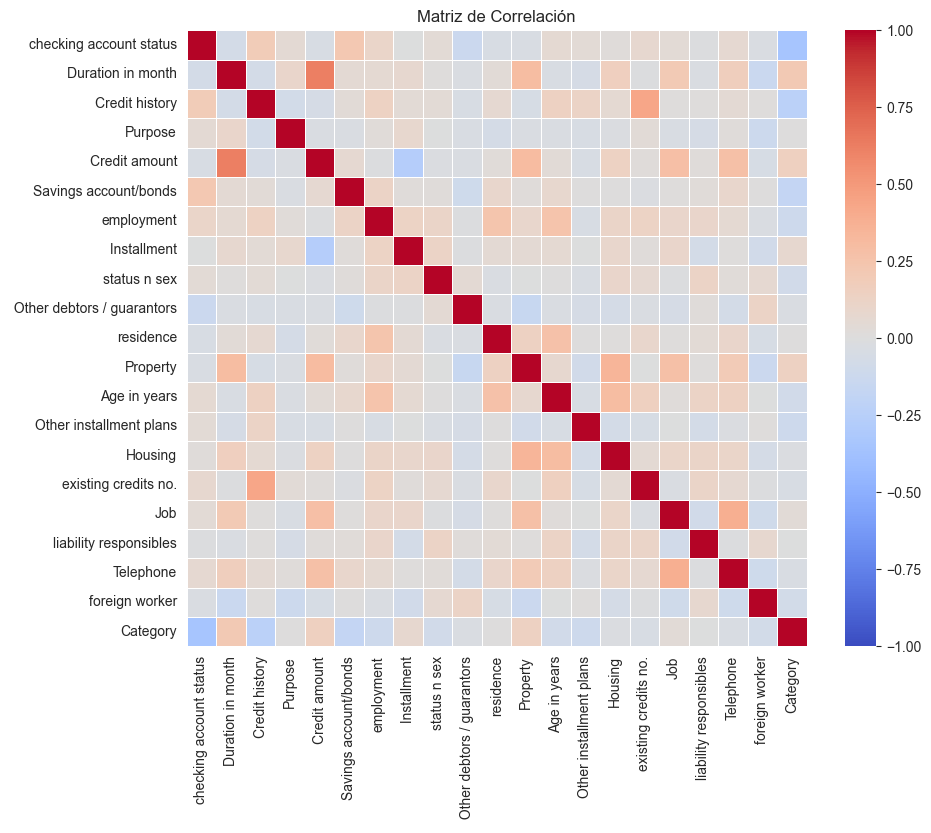

In [332]:
# Se muestra la matriz de correlación
correlation_matrix = df_copy.corr()

print("Matriz de Correlación:")
print(correlation_matrix)
# Se visualiza de manera mas amigable la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

---

Como se puede ver, en terminos de correlación de las variables con respecto a la variable objetivo, no existe una correlación lo suficientemente alta como para descartar alguna de las variables para realizar el modelo, pues ninguna supera el 0.20 en terminos de correlación directa con dicha variable.

---








### **Distribución de las variables**

En primer lugar, se verifica la distribución de la variable objetivo para verificar que este igualmente distribuida entre los dos posibles valores que puede tomar la variable {1, 2}

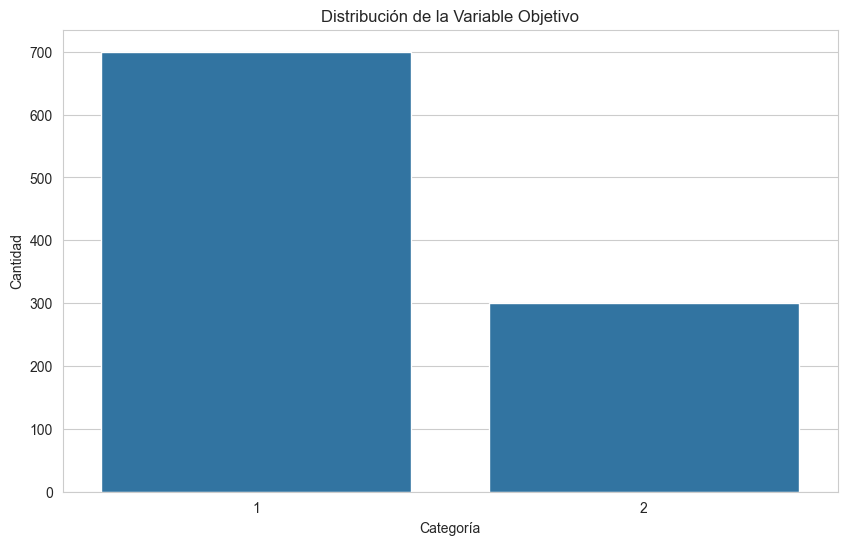

In [333]:
# Crear gráfico de barras directamente desde value_counts
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()



---



En este caso, se puede ver que existe un mayor número de datos que contienen los valores de (1), lo cual indica que la mayoria de personas dentro del dataset representan un buen riesgo crediticio. No obstante, este desbalanceo entre las clases puede afectar el rendimiento del modelo.



---



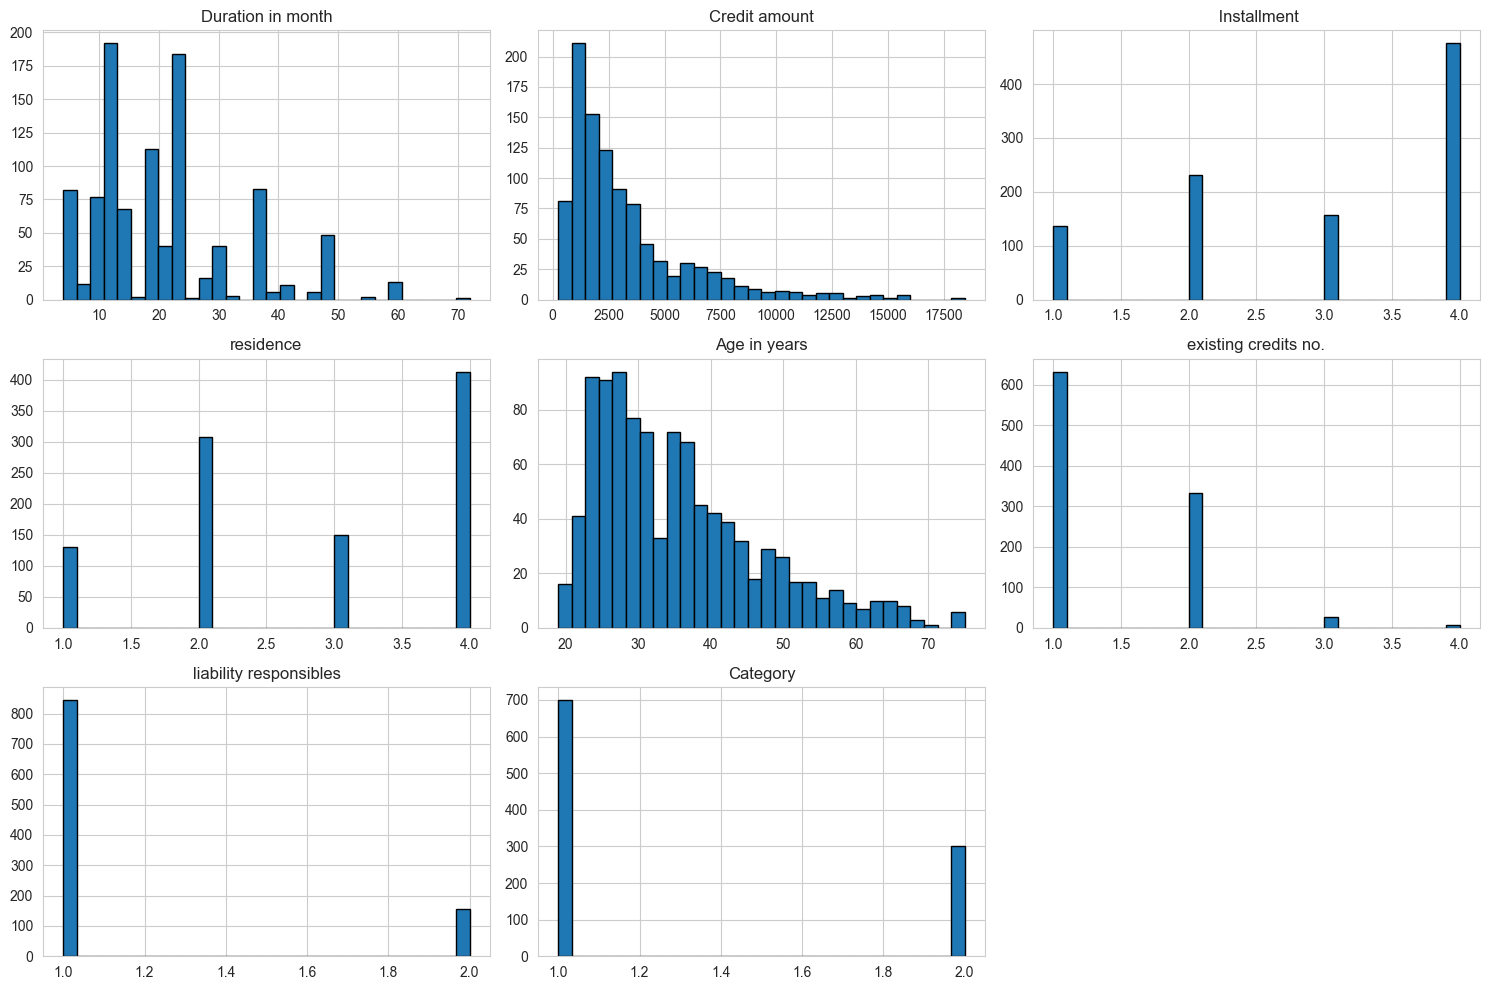

In [334]:
# Histograma para todas las variables numéricas
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

## **Limpieza de datos**

En primer lugar para la limpieza de datos y selección de variables, se va a verificar el número de valores faltantes y de datos duplicados en caso de que existan.

### **Validación de datos**

In [335]:
# Valores Faltantes por columna
df.isna().sum()

checking account status        0
Duration in month              0
Credit history                 0
Purpose                        0
Credit amount                  0
Savings account/bonds          0
employment                     0
 Installment                   0
status n sex                   0
 Other debtors / guarantors    0
residence                      0
Property                       0
Age in years                   0
Other installment plans        0
Housing                        0
existing credits no.           0
Job                            0
liability responsibles         0
Telephone                      0
foreign worker                 0
Category                       0
dtype: int64

In [336]:
# Valores duplicados en el Dataframe
df.duplicated().sum()

0

Como se puede evidenciar no existen ni valores faltantes, ni duplicados en el conjunto de datos.


## **Modelo de Clasificación Bayes MultinomialNB**

### **Construcción del dataset**

En primer lugar como se utilizará un clasificador de bayes ingenuo de tipo Multinomial, se debe realizar la transformación de las variables númericas a categóricas, para esto se va a realizar un corte de los valores de las variables númericas en intervalos de igual tamaño y se va a realizar el One Hot Encoding para las variables categóricas.

In [337]:
columnas_numericas = df.drop(columns=['Category']).select_dtypes(include=['int64', 'float64']).columns #Se omite variable objetivo
df_numerico = df[columnas_numericas] 
df_c = df.drop(columns=columnas_numericas)
df_numerico.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration in month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age in years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing credits no.,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
liability responsibles,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [338]:
df_c["Duration in month C"] = pd.qcut(df_numerico["Duration in month"], 5, duplicates='drop')
df_c["Credit Amount C"] = pd.qcut(df_numerico["Credit amount"], 11, duplicates='drop')
df_c["Installment C"] = pd.qcut(df_numerico[" Installment"], 5, duplicates='drop')
df_c["Residence C"] = pd.qcut(df_numerico["residence"], 5, duplicates='drop')
df_c["Age C"] = pd.qcut(df_numerico["Age in years"], 5, duplicates='drop')
df_c["Existing C"] = pd.qcut(df_numerico["existing credits no."], 5, duplicates='drop')
df_c["Liability responsibles C"] = pd.qcut(df_numerico["liability responsibles"], 3, duplicates='drop')


In [339]:
df_columnas = df_c.drop(columns ="Category").columns
df_c = pd.get_dummies(df_c, columns=df_columnas)
df_c

,Category,checking account status_A11,checking account status_A12,checking account status_A13,checking account status_A14,Credit history_A30,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,...,"Residence C_(0.999, 2.0]","Residence C_(2.0, 4.0]","Age C_(18.999, 26.0]","Age C_(26.0, 30.0]","Age C_(30.0, 36.0]","Age C_(36.0, 45.0]","Age C_(45.0, 75.0]","Existing C_(0.999, 2.0]","Existing C_(2.0, 4.0]","Liability responsibles C_(0.999, 2.0]"
0,1,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,True
1,2,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,True
2,1,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,True
3,1,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
4,2,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,False,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,True
996,1,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
997,1,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
998,2,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,True,False,True


### **División de los datos de prueba y entrenamiento**

In [340]:
import sklearn.model_selection as model_selection
X_data_bayes = df_c.drop(columns='Category', axis=1)
y_data_bayes = df_c['Category']
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = model_selection.train_test_split(X_data_bayes, y_data_bayes, test_size=0.3, random_state=42, stratify=y_data_bayes)
# Stratify asegura que cada conjunto (entrenamiento y prueba) tenga la misma proporción de cada clase que el dataset original.

In [341]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clasificador_bayes = MultinomialNB()
clasificador_bayes.fit(X_train_bayes, y_train_bayes)

MultinomialNB()

### Predecir las clase en datos de prueba 

In [342]:
y_pred_bayes = clasificador_bayes.predict(X_test_bayes)
y_pred_bayes

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

### **Evaluación del Modelo**

In [343]:
print('Precision del clasificador en el train set: {:.2f}'.format(clasificador_bayes.score(X_train_bayes, y_train_bayes)))
print('Precision del clasificador en el test set: {:.2f}'.format(clasificador_bayes.score(X_test_bayes, y_test_bayes)))

Precision del clasificador en el train set: 0.78
Precision del clasificador en el test set: 0.74


In [344]:
print(classification_report(y_test_bayes, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.81      0.82      0.82       210
           2       0.57      0.56      0.56        90

    accuracy                           0.74       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.74      0.74       300



#### **Matriz de Confusión**

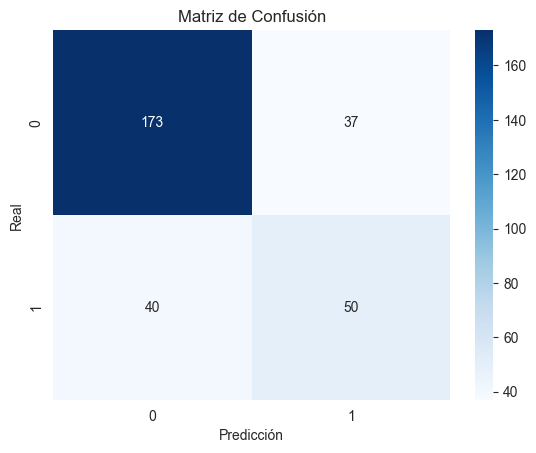

In [345]:
cm_bayes = confusion_matrix(y_test_bayes, y_pred_bayes)
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### **Validación Cruzada**

In [358]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clasificador_bayes, X_data_bayes, y_data_bayes, cv=5)
print("Resultados de la validación cruzada: ", scores)
print('Precisión de la validación cruzada: {:.2f}'.format(scores.mean()))

Resultados de la validación cruzada:  [0.775 0.74  0.78  0.72  0.78 ]
Precisión de la validación cruzada: 0.76


## **Regresion Logistica**

### **Selección de variables**
Tomando en consideración la correlación de las variables y el contexto se decidio remover algunas de las variables independientes que tienen menos correlación con la variable objetivo y además esto se realiza para evitar algun tipo de sesgo por condición que pueda tener el modelo, de manera que las variables seleccionadas para la regresión logistica son:

- Checking account status
- Duration in month
- Credit History
- Credit Amount
- Employment
- Savings account/bonds
- Property
- Other installment plans

In [346]:
# Lista de variables a conservar
variables_a_conservar = [
    'checking account status',
    'Duration in month',
    'Credit history',
    'Credit amount',
    'employment',
    'Savings account/bonds',
    'Property',
    'Other installment plans',
    'Category'
]

# Filtrar el DataFrame para mantener solo las columnas deseadas
df_filtrado = df[variables_a_conservar]

# Mostrar las primeras filas del DataFrame filtrado para verificar
df_filtrado.head()

,checking account status,Duration in month,Credit history,Credit amount,employment,Savings account/bonds,Property,Other installment plans,Category
0,A11,6,A34,1169,A75,A65,A121,A143,1
1,A12,48,A32,5951,A73,A61,A121,A143,2
2,A14,12,A34,2096,A74,A61,A121,A143,1
3,A11,42,A32,7882,A74,A61,A122,A143,1
4,A11,24,A33,4870,A73,A61,A124,A143,2


### **Preparación de datos**
En primer lugar, si utilizara StandardScaler para las variables numéricas del df, esto para alinear las escalas de todas las características para que contribuyan de manera equitativa al modelo.

In [347]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas
columnas_numericas = df_filtrado.drop(columns=['Category']).select_dtypes(include=['int64', 'float64']).columns #Se omite variable objetivo

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las columnas numéricas
df_filtrado.loc[:,columnas_numericas] = scaler.fit_transform(df_filtrado[columnas_numericas])

# Mostrar las primeras filas del DataFrame escalado para verificar
df_filtrado.head()


/var/folders/fm/j8wz182j6b1869lk70fr1g5w0000gn/T/ipykernel_8650/645142017.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.25695309  1.25257373 -0.73866754  0.75476341 -0.73866754  2.24819436
 -0.73866754  0.25695309 -0.48976238  0.25695309  0.25695309  0.75476341
  0.25695309  0.25695309 -0.9875727  -1.23647786 -0.90460432 -0.73866754
 -0.90460432 -1.23647786 -1.23647786 -0.73866754 -1.15350947  3.243815
 -0.24085723  0.25695309 -0.24085723 -0.73866754 -0.73866754  1.9992892
  2.24819436 -0.24085723 -0.90460432 -0.9875727   0.75476341 -0.73866754
 -0.24085723  0.75476341  2.24819436 -0.82163593  1.25257373 -1.23647786
 -0.82163593 -0.73866754  0.25695309  0.50585825 -0.73866754 -0.24085723
  1.25257373 -1.23647786 -0.73866754  1.25257373 -0.24085723  1.25257373
 -0.9875727  -0.48976238  1.25257373  2.24819436  0.25695309  0.50585825
 

,checking account status,Duration in month,Credit history,Credit amount,employment,Savings account/bonds,Property,Other installment plans,Category
0,A11,-1.236478,A34,-0.745131,A75,A65,A121,A143,1
1,A12,2.248194,A32,0.949817,A73,A61,A121,A143,2
2,A14,-0.738668,A34,-0.416562,A74,A61,A121,A143,1
3,A11,1.750384,A32,1.634247,A74,A61,A122,A143,1
4,A11,0.256953,A33,0.566664,A73,A61,A124,A143,2


En este caso se va a realizar el One Hot Encoding para las variables categóricas para convertir las variables en valores numéricos en variables binarias y para evitar las suposiciones de peso de las variables (en caso de que sea un numero mayor).

In [348]:
# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_filtrado, drop_first=False)

# Mostrar las primeras filas del DataFrame codificado para verificar
df_encoded.head()

,Duration in month,Credit amount,Category,checking account status_A11,checking account status_A12,checking account status_A13,checking account status_A14,Credit history_A30,Credit history_A31,Credit history_A32,...,Savings account/bonds_A63,Savings account/bonds_A64,Savings account/bonds_A65,Property_A121,Property_A122,Property_A123,Property_A124,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143
0,-1.236478,-0.745131,1,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,2.248194,0.949817,2,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-0.738668,-0.416562,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,1.750384,1.634247,1,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,0.256953,0.566664,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


### **División de los datos de prueba y entrenamiento**

In [349]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Category', axis=1)  # Variables independientes
y = df_encoded['Category']                # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify asegura que cada conjunto (entrenamiento y prueba)
                                                                                                      # tenga la misma proporción de cada clase que el dataset original.

### **Entrenamiento del modelo**

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Creación y evaluación del modelo de regresión logística
logistic_regression_model = LogisticRegression(max_iter=1000)

# Entrenamiento
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predecir las clase en datos de prueba 

In [351]:
y_pred = logistic_regression_model.predict(X_test)

### **Evaluación del Modelo**

In [352]:
print('Precision del clasificador en el train set: {:.2f}'.format(logistic_regression_model.score(X_train, y_train)))
print('Precision del clasificador en el test set: {:.2f}'.format(logistic_regression_model.score(X_test, y_test)))

Precision del clasificador en el train set: 0.75
Precision del clasificador en el test set: 0.76


In [353]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.90      0.84       210
           2       0.66      0.44      0.53        90

    accuracy                           0.76       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.75      0.76      0.75       300



#### **Matriz de Confusión**

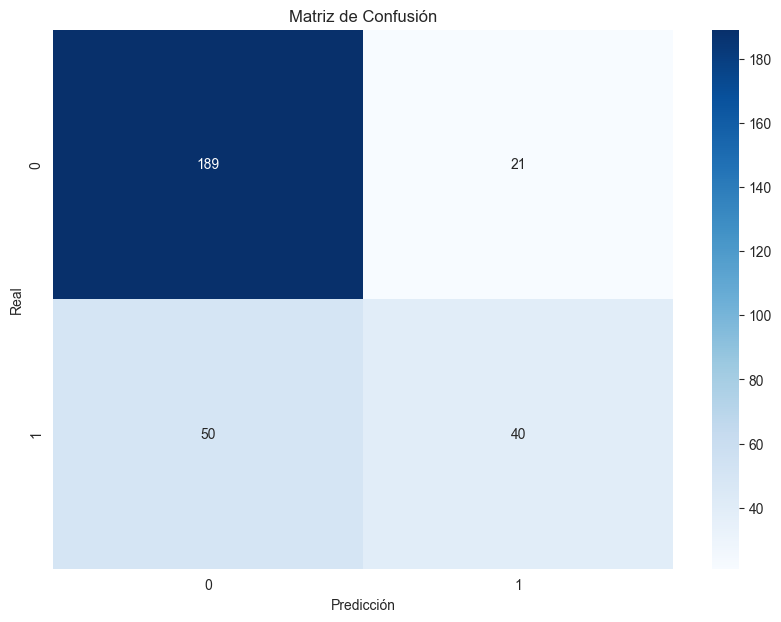

In [355]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()